# Chapter 14. Introduction to Multimedia Data
## Notebook for Python

In [10]:
!pip3 install Pillow requests numpy sklearn
!pip3 install tensorflow keras

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
import numpy as np

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.metrics.pairwise import (
    cosine_similarity)
from sklearn.ensemble import (
    RandomForestClassifier)
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### 15.1 Storing, representing, and converting multimedia data

In [12]:
myimg1 = Image.open(requests.get(
    "https://cssbook.net/d/259_3_32_15.jpg",
    stream=True).raw)
myimg2 = Image.open(requests.get(
    "https://cssbook.net/d/298_5_52_15.png",
    stream=True).raw)
print(myimg1)
print(myimg2)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=805x453 at 0x7F67D88446A0>
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1540x978 at 0x7F67D8844D90>


In [13]:
myimg1_L = myimg1.convert("L")
print(type(myimg1_L))
myimg1_L_array = np.array(myimg1_L)
print(type(myimg1_L_array))
print(myimg1_L_array.shape)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(453, 805)


In [14]:
myimg1_RGB = myimg1.convert("RGB")
print(type(myimg1_RGB))
myimg1_RGB_array = np.array(myimg1_RGB)
print(type(myimg1_RGB_array))
print(myimg1_RGB_array.shape)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(453, 805, 3)


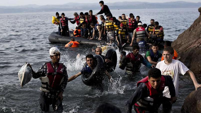

In [15]:
#Resize and visalize myimg1. Reduce to 25%
myimg1_RGB_25 = myimg1_RGB.resize(
    (int(myimg1_RGB.width * 0.25),
     int(myimg1_RGB.height * 0.25)))
myimg1_RGB_25

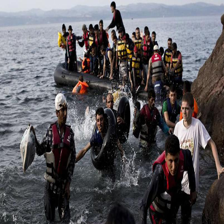

In [16]:
#Resize to 224 x 224
myimg1_RGB_224 = myimg1_RGB.resize(
    (224,224))
myimg1_RGB_224

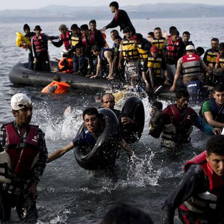

In [17]:
#Crop and resize to 224 x 224

#Adapted from Webb, Casas & Wilkerson (2020)
def crop(img):
    height = img.height
    width = img.width
    hw_dif = abs(height - width)
    hw_halfdif = hw_dif / 2
    crop_leftright = width > height
    if crop_leftright:
        y0 = 0
        y1 = height
        x0 = 0 + hw_halfdif
        x1 = width - hw_halfdif        
    else:
        y0 = 0 + hw_halfdif
        y1 = height - hw_halfdif
        x0 = 0
        x1 = width
    return img.crop((x0, y0, x1, y1))

myimg1_RGB_crop = crop(myimg1_RGB)
myimg1_RGB_crop_224 = myimg1_RGB_crop.resize(
    (224,224))
myimg1_RGB_crop_224

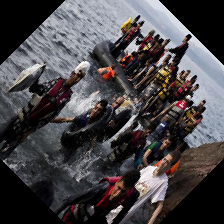

In [18]:
#Rotate 45 degrees
myimg1_RGB_224_rot=myimg1_RGB_224.rotate(-45)
myimg1_RGB_224_rot

In [19]:
#Create two 15x15 small images to compare

#image1
myimg1_RGB_crop_15 = myimg1_RGB_crop_224.resize(
    (15,15))
#image2
myimg2_RGB = myimg2.convert("RGB")
myimg2_RGB_array = np.array(myimg2_RGB)
myimg2_RGB_crop = crop(myimg2_RGB)
myimg2_RGB_crop_224 = myimg2_RGB_crop.resize(
    (224,224))
myimg2_RGB_crop_15 = myimg2_RGB_crop_224.resize(
    (15,15))

img_vect1 = np.array(myimg1_RGB_crop_15).flatten()
img_vect2 = np.array(myimg2_RGB_crop_15).flatten()

matrix = np.row_stack((img_vect1, img_vect2))

sim_mat = cosine_similarity(matrix)
sim_mat

array([[1.        , 0.86462734],
       [0.86462734, 1.        ]])

In [20]:
myimg2_RGB_array.shape

(978, 1540, 3)

### 15.2 Image classification

#### 15.2.1 Basic classification with shallow algorithms

In [21]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print("Shape = ", X.shape)
print("Numbers in training set= ", y_train[0:10])
print("Numbers in test set= ", y_test[0:10])

Shape =  (70000, 784)
Numbers in training set=  [5 0 4 1 9 2 1 3 1 4]
Numbers in test set=  [7 2 1 0 4 1 4 9 5 9]


In [22]:
#Multiclass classification with RandomForest
forest_clf = RandomForestClassifier(
    n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
print(forest_clf)
print("Predict the first 10 numbers of our set:", 
      forest_clf.predict([X_test[0], X_test[1],
            X_test[2], X_test[3], X_test[4],
            X_test[5], X_test[6], X_test[7],
            X_test[8], X_test[9]]))

predictions = forest_clf.predict(X_test)
print("Accuracy: ", accuracy_score(
    y_test, predictions))

RandomForestClassifier(random_state=42)
Predict the first 10 numbers of our set: [7 2 1 0 4 1 4 9 5 9]
Accuracy:  0.9705


#### 15.2.2 Deep Learning for Image Analysis

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = \
    fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser",
               "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape, X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss=
              "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                verbose=2, validation_split=0.1)

print("Evaluation: ")
print(model.evaluate(X_test, y_test))

Epoch 1/5
1688/1688 - 3s - loss: 0.3808 - accuracy: 0.8661 - val_loss: 0.3957 - val_accuracy: 0.8595
Epoch 2/5
1688/1688 - 3s - loss: 0.3678 - accuracy: 0.8705 - val_loss: 0.3713 - val_accuracy: 0.8655
Epoch 3/5
1688/1688 - 3s - loss: 0.3556 - accuracy: 0.8744 - val_loss: 0.3878 - val_accuracy: 0.8618
Epoch 4/5
1688/1688 - 3s - loss: 0.3459 - accuracy: 0.8780 - val_loss: 0.3566 - val_accuracy: 0.8708
Epoch 5/5
1688/1688 - 3s - loss: 0.3362 - accuracy: 0.8809 - val_loss: 0.3570 - val_accuracy: 0.8690
Evaluation: 
313/313 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8621
[0.38263869285583496, 0.8621000051498413]


In [14]:
X_new = X_test[:6]
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

#### 15.2.3 Re-using an open source CNN

In [28]:
model_resnet50 = \
keras.applications.resnet50.ResNet50(
    weights="imagenet")
#model_resnet50.summary()

102973440/102967424 [==============================] - 9s 0us/step


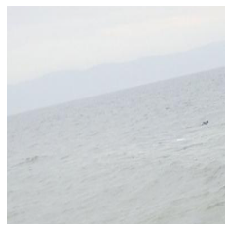

In [29]:
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
picture1 = np.array(myimg2_RGB)/255
picture2 = np.array(myimg2_RGB)/255
images = np.array([picture1, picture2])
see = [0, 0, 0.3, 0.3]
refugees = [0.1, 0.35, 0.8, 0.95]
tf_images = tf.image.crop_and_resize(images,
            [see, refugees], [0, 1], [224, 224])
plot_color_image(tf_images[0])
plt.show()

In [30]:
inputs = \
keras.applications.resnet50.preprocess_input(
    tf_images * 255)
Y_proba = model_resnet50.predict(inputs)
preds = \
keras.applications.resnet50.decode_predictions(
    Y_proba, top=3)
preds[0]

40960/35363 [==================================] - 0s 0us/step


[('n09421951', 'sandbar', 0.083578914),
 ('n09428293', 'seashore', 0.061473377),
 ('n09246464', 'cliff', 0.05028374)]

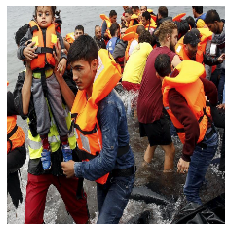

In [31]:
plot_color_image(tf_images[1])
plt.show()

In [32]:
preds[1]

[('n03662601', 'lifeboat', 0.19698676),
 ('n09472597', 'volcano', 0.100913115),
 ('n02066245', 'grey_whale', 0.05104692)]

### 15.3 Using existing libraries and APIs